## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [13]:
# your code here

#model1 = nn.Sequential(OrderedDict([
#    ('hidden', nn.
#]))

model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2,2)),
    ('sigmoid', nn.Sigmoid()),
    ('output', nn.Linear(2,1)),
    ('sigmoid', nn.Sigmoid())
]))

model2 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2,4)),
    ('sigmoid', nn.Sigmoid()),
    ('output', nn.Linear(4,1)),
    ('sigmoid', nn.Sigmoid())
]))

model3 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2,8)),
    ('sigmoid', nn.Sigmoid()),
    ('output', nn.Linear(8,1)),
    ('sigmoid', nn.Sigmoid())
]))

In [14]:
print(model1)
print(model2)
print(model3)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=4, out_features=1, bias=True)
)
Sequential(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [15]:
# your code here
#data_in = torch.tensor( ...
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [16]:
# your code here
# data_target = torch.tensor( ...
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [17]:
# Define the loss function and optimizer
# Define the binary cross-entropy loss function
criterion = nn.BCEWithLogitsLoss()
# Stochastic gradient descent optimizer
optimizer_model1 = torch.optim.SGD(model1.parameters(), lr=0.1)
optimizer_model2 = torch.optim.SGD(model2.parameters(), lr=0.1)
optimizer_model3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [23]:
# your code here
# Train the model
num_epochs = 1000

print('Model_1')
for epoch in range(num_epochs):
    #forward pass
    outputs = model1(data_in)
    loss = criterion(outputs, data_target)
    
    #Backward pass and optimization
    optimizer_model1.zero_grad()
    loss.backward()
    optimizer_model1.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
print('Model_2')
for epoch in range(num_epochs):
    #forward pass
    outputs = model2(data_in)
    loss = criterion(outputs, data_target)
    
    #Backward pass and optimization
    optimizer_model2.zero_grad()
    loss.backward()
    optimizer_model2.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
print('Model_3')
for epoch in range(num_epochs):
    #forward pass
    outputs = model3(data_in)
    loss = criterion(outputs, data_target)
    
    #Backward pass and optimization
    optimizer_model3.zero_grad()
    loss.backward()
    optimizer_model3.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    


Model_1
Epoch [100/1000], Loss: 0.6293
Epoch [200/1000], Loss: 0.6182
Epoch [300/1000], Loss: 0.6068
Epoch [400/1000], Loss: 0.5955
Epoch [500/1000], Loss: 0.5846
Epoch [600/1000], Loss: 0.5745
Epoch [700/1000], Loss: 0.5651
Epoch [800/1000], Loss: 0.5565
Epoch [900/1000], Loss: 0.5487
Epoch [1000/1000], Loss: 0.5415
Model_2
Epoch [100/1000], Loss: 0.6923
Epoch [200/1000], Loss: 0.6923
Epoch [300/1000], Loss: 0.6922
Epoch [400/1000], Loss: 0.6921
Epoch [500/1000], Loss: 0.6921
Epoch [600/1000], Loss: 0.6920
Epoch [700/1000], Loss: 0.6919
Epoch [800/1000], Loss: 0.6918
Epoch [900/1000], Loss: 0.6917
Epoch [1000/1000], Loss: 0.6915
Model_3
Epoch [100/1000], Loss: 0.4900
Epoch [200/1000], Loss: 0.4539
Epoch [300/1000], Loss: 0.4161
Epoch [400/1000], Loss: 0.3776
Epoch [500/1000], Loss: 0.3396
Epoch [600/1000], Loss: 0.3033
Epoch [700/1000], Loss: 0.2696
Epoch [800/1000], Loss: 0.2392
Epoch [900/1000], Loss: 0.2123
Epoch [1000/1000], Loss: 0.1889


Model 1's predictions:
tensor([[0.],
        [0.],
        [0.],
        [1.]])


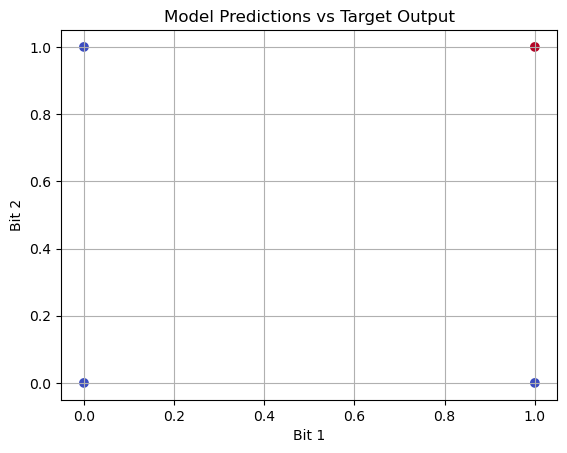

Model 2's predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.]])


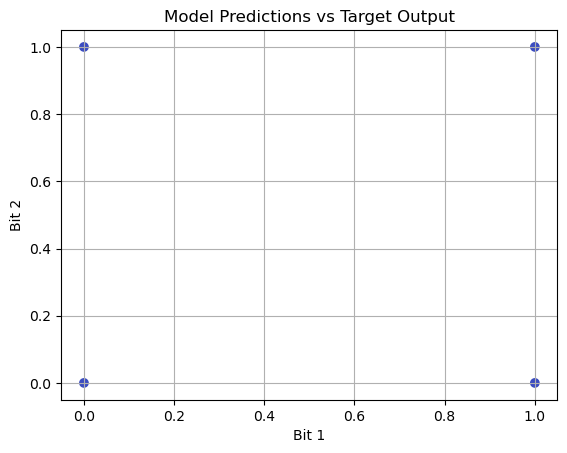

Model 3's predictions:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


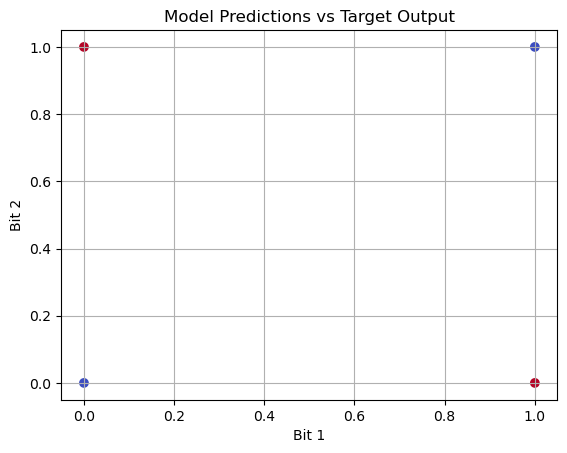

In [24]:
# your code here
# visualize the resuts

# a heatmap that shows the predicted output for each combination of input bits. The color of each square in the heatmap 
# corresponds to the output value (0 or 1), with blue indicating 0 and red indicating 1

import matplotlib.pyplot as plt

# for MODEL 1:

output = model1(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 1's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap='coolwarm')
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model Predictions vs Target Output')
ax.grid()

plt.show()

# for MODEL 2:

output = model2(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 2's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap='coolwarm')
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model Predictions vs Target Output')
ax.grid()

plt.show()

# for MODEL 3:

output = model3(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 3's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap='coolwarm')
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model Predictions vs Target Output')
ax.grid()

plt.show()


In [26]:
# your code here
# print model wights

accuracies=[]
models = [model1,model2,model3]

for model in models:
    model.eval()
    with torch.no_grad():
        outputs = model(data_in)
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == data_target).float().mean()
        accuracies.append(accuracy)
    print("Accuracy: {:.2f}%".format(accuracy.item() * 100))

best_model = models[accuracies.index(max(accuracies))]

print('Model ' + str(accuracies.index(max(accuracies)) + 1) + ' is the best!')

print('\n')

# Display the weights of each layer in the selected model
for name, param in best_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


Accuracy: 25.00%
Accuracy: 50.00%
Accuracy: 100.00%
Model 3 is the best!


hidden.weight tensor([[-0.1241,  0.2673],
        [ 1.1970,  0.6262],
        [-3.1984,  4.4425],
        [ 1.0765,  0.0608],
        [ 0.4341, -0.4127],
        [ 3.6421,  3.9724],
        [ 2.9424, -1.7877],
        [-1.8018,  0.7147]])
hidden.bias tensor([ 0.6073, -1.1107,  1.5882, -0.3185,  0.4889, -0.7548,  0.8185, -0.3148])
output.weight tensor([[ 0.6385, -1.2564, -4.2958, -0.7960, -0.0847,  4.9523, -2.7056,  1.9362]])
output.bias tensor([0.9679])
